#Importing Libraries

In [174]:
# These are the libraries we are going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
np.random.seed(2)

#Task 1 - Unsupervised Learning

##Data Wrangling

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
#data downloaded from https://www.kaggle.com/datasets/datascientistanna/customers-dataset?select=Customers.csv
df= pd.read_csv('/content/drive/MyDrive/Customers.csv')

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [6]:
df.shape

(2000, 8)

In [7]:
#dropping customerID as it is useless
df = df.drop('CustomerID', axis=1)

In [8]:
df.shape

(2000, 7)

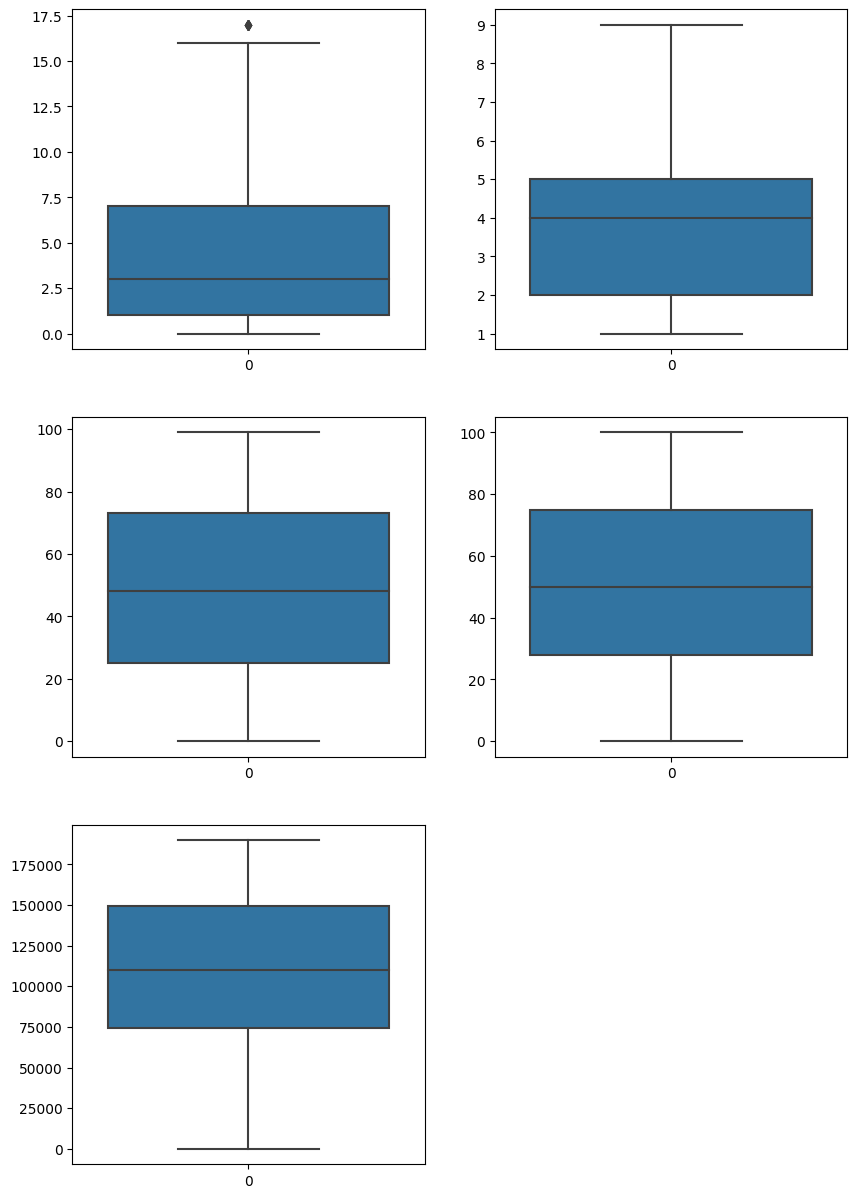

In [9]:
#work experience has outliers
plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
sns.boxplot(data = df['Work Experience'])

plt.subplot(3,2,2)
sns.boxplot(data = df['Family Size'])

plt.subplot(3,2,3)
sns.boxplot(data = df['Age'])

plt.subplot(3,2,4)
sns.boxplot(data = df['Spending Score (1-100)'])

plt.subplot(3,2,5)
sns.boxplot(data = df['Annual Income ($)'])
plt.show()

In [10]:
df['Work Experience'].describe()

count    2000.000000
mean        4.102500
std         3.922204
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: Work Experience, dtype: float64

In [11]:
#calculating iqr,q1 and q3 and replacing outliers as null values
for x in ['Work Experience']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.2*intr_qr)
    min = q25-(1.2*intr_qr)
 
    #keeping non-outliers
    df= df[((df[x]<max) &(df[x]>min))]

In [12]:
df.isna().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [13]:
#percentage of null values
df.isnull().sum()/100

Gender                    0.00
Age                       0.00
Annual Income ($)         0.00
Spending Score (1-100)    0.00
Profession                0.35
Work Experience           0.00
Family Size               0.00
dtype: float64

In [14]:
df['Profession'].mode()

0    Artist
Name: Profession, dtype: object

In [15]:
df['Profession'].fillna('Artist', inplace= True)

<ipython-input-15-1685da6c15c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profession'].fillna('Artist', inplace= True)


In [16]:
#dropping duplicates
df= df.drop_duplicates()

In [17]:
df.shape

(1976, 7)

##Data Visualisation


In [18]:
#checking counts of male-female ratio
df['Gender'].value_counts()

Female    1172
Male       804
Name: Gender, dtype: int64

In [19]:
#checking counts for each profession
df['Profession'].value_counts()

Artist           637
Healthcare       336
Entertainment    233
Engineer         177
Doctor           158
Executive        151
Lawyer           140
Marketing         84
Homemaker         60
Name: Profession, dtype: int64

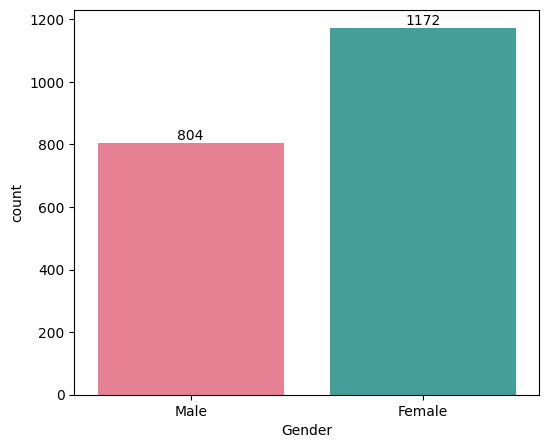

In [20]:
#there are more females than males in this dataset
plt.figure(figsize = (6, 5))
plot1 = sns.countplot(x='Gender', data=df, palette="husl")
plot1.bar_label(plot1.containers[0]);

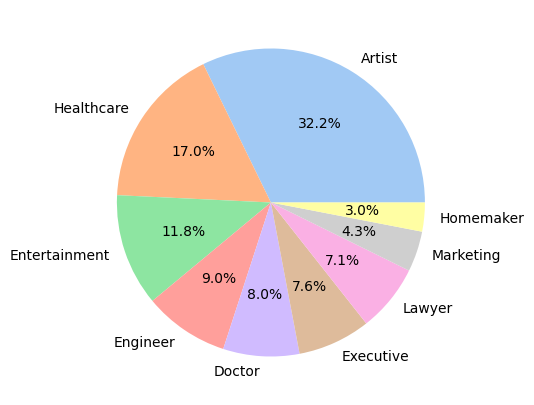

In [21]:
#artist is the most common profession
plt.figure(figsize=(6,5))
df2=df["Profession"].value_counts()
df3=pd.DataFrame(df2)
plt.pie(df3["Profession"],labels=df3.index,autopct="%0.01f%%",colors=sns.color_palette("pastel"));

<Axes: xlabel='Profession', ylabel='count'>

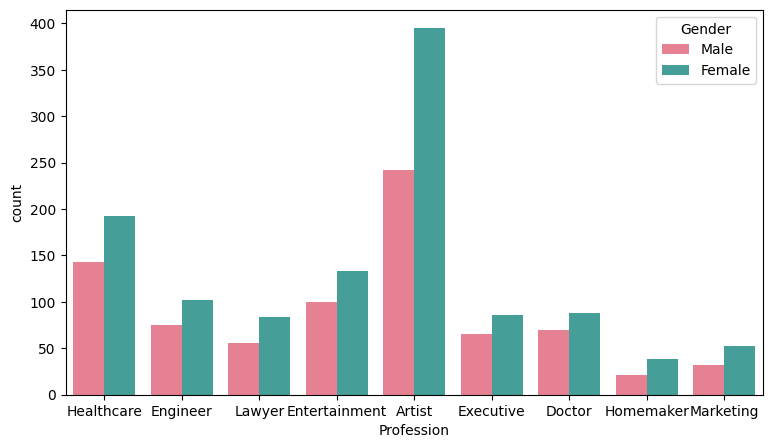

In [22]:
#the ratio of males to females for each profession
plt.figure(figsize=(9,5))
sns.countplot(data = df,x="Profession",hue="Gender",palette="husl")

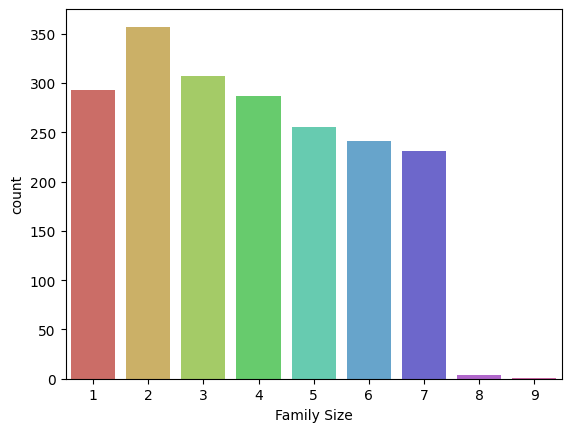

In [23]:
#the most common family size
plot3 = sns.countplot(x='Family Size', data=df, palette="hls")

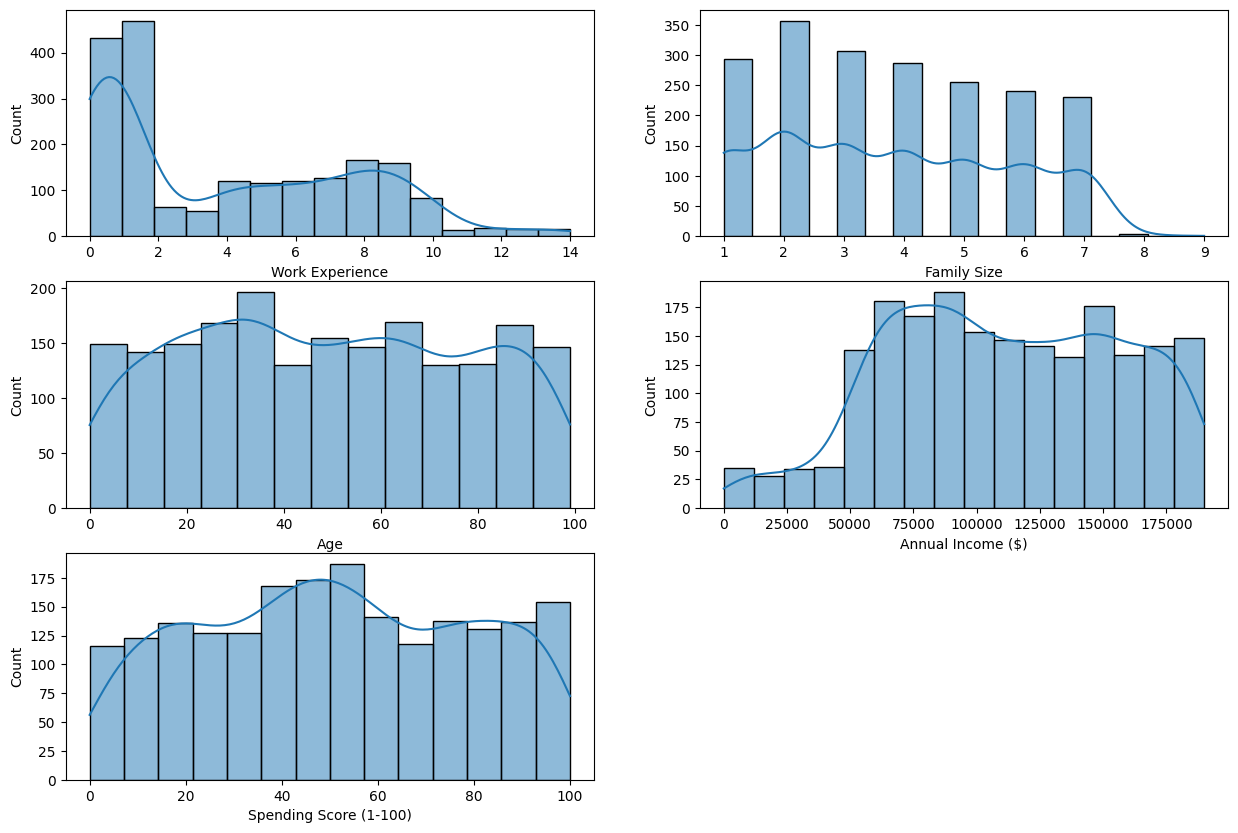

In [24]:
#checking skewness
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.histplot(df['Work Experience'], kde=True)

plt.subplot(3,2,2)
sns.histplot(df['Family Size'], kde=True)

plt.subplot(3,2,3)
sns.histplot(df['Age'], kde=True)

plt.subplot(3,2,4)
sns.histplot(df['Annual Income ($)'], kde=True)

plt.subplot(3,2,5)
sns.histplot(df['Spending Score (1-100)'], kde=True)

plt.show()

#none are normally distributed and work experience is skewed to the right

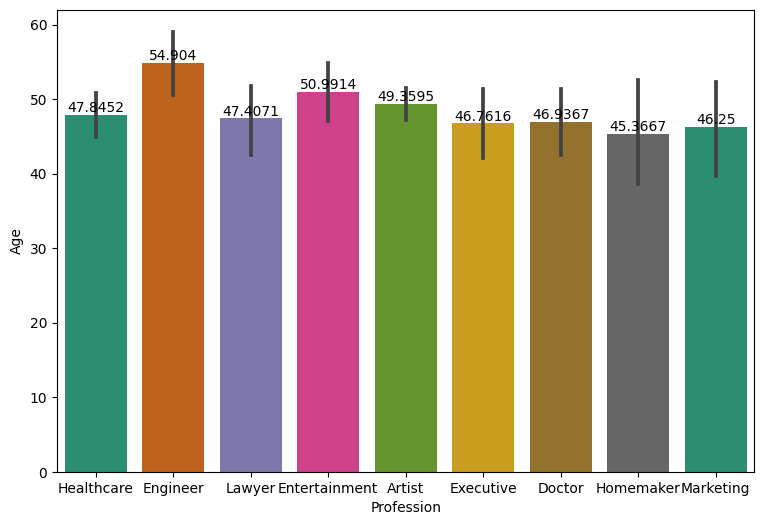

In [25]:
#engineers had the oldest workers
plt.figure(figsize=(9,6))
plot2=sns.barplot(data=df,x="Profession",y="Age",palette="Dark2")
plot2.bar_label(plot2.containers[0]);

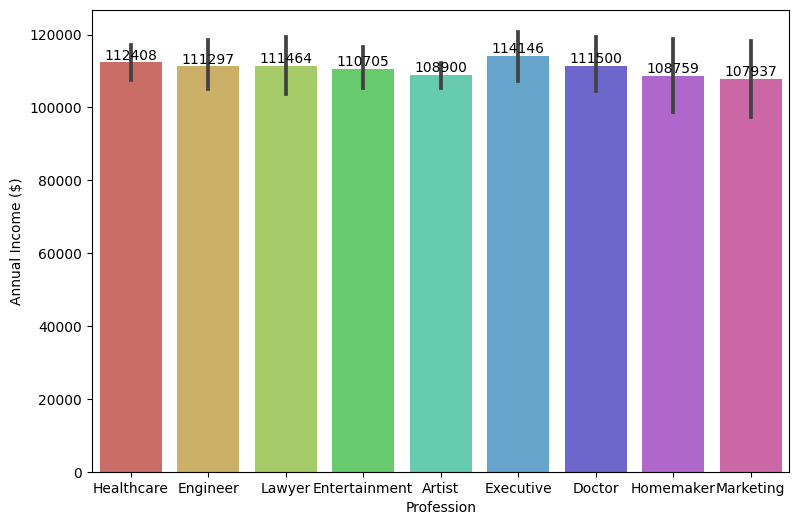

In [26]:
#executive gets the highest income
plt.figure(figsize=(9,6))
plot4= sns.barplot(data=df,x="Profession",y="Annual Income ($)",palette= 'hls')
plot4.bar_label(plot4.containers[0]);

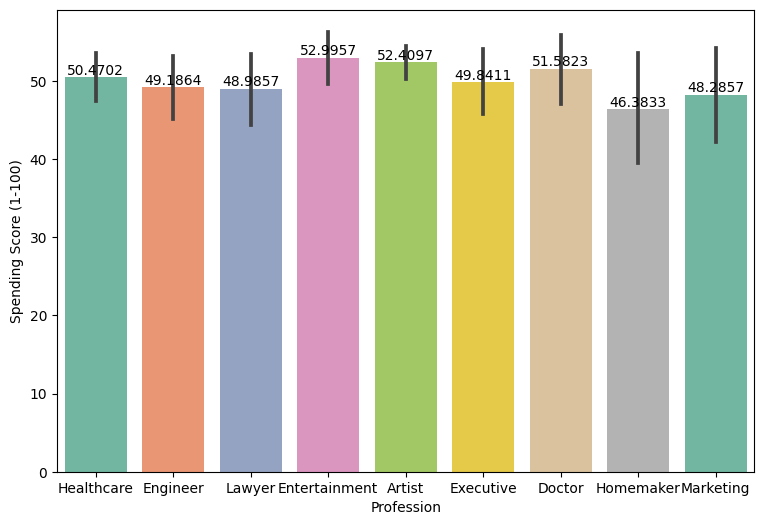

In [27]:
#entertainment profession has the highest spending score
plt.figure(figsize=(9,6))
plot5=sns.barplot(data=df,x="Profession",y="Spending Score (1-100)",palette= 'Set2')
plot5.bar_label(plot5.containers[0]);

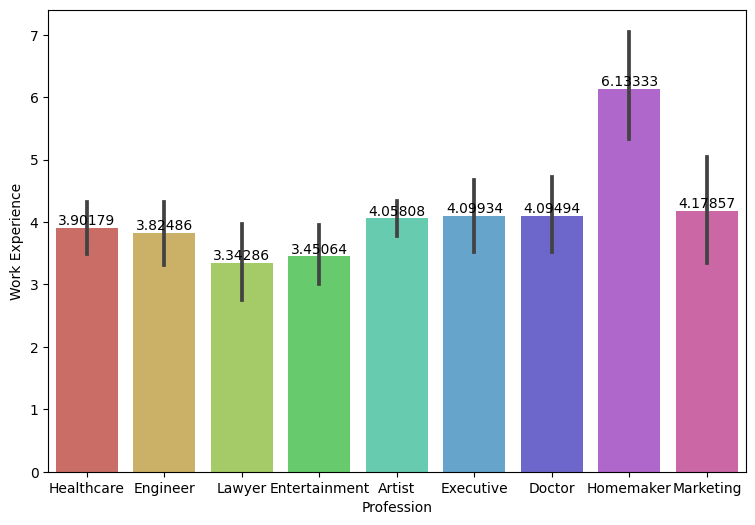

In [28]:
#homemaker has the longest work experience
plt.figure(figsize=(9,6))
plot6=sns.barplot(data=df,x="Profession",y="Work Experience",palette= 'hls')
plot6.bar_label(plot6.containers[0]);

<Axes: xlabel='Annual Income ($)', ylabel='Gender'>

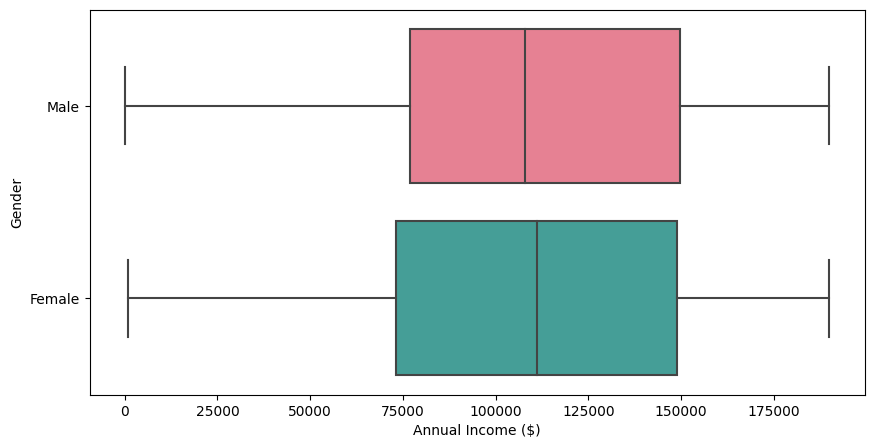

In [29]:
#the annual income for males is higher than females
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x= 'Annual Income ($)', y= 'Gender',palette= 'husl')

<Axes: xlabel='Spending Score (1-100)', ylabel='Gender'>

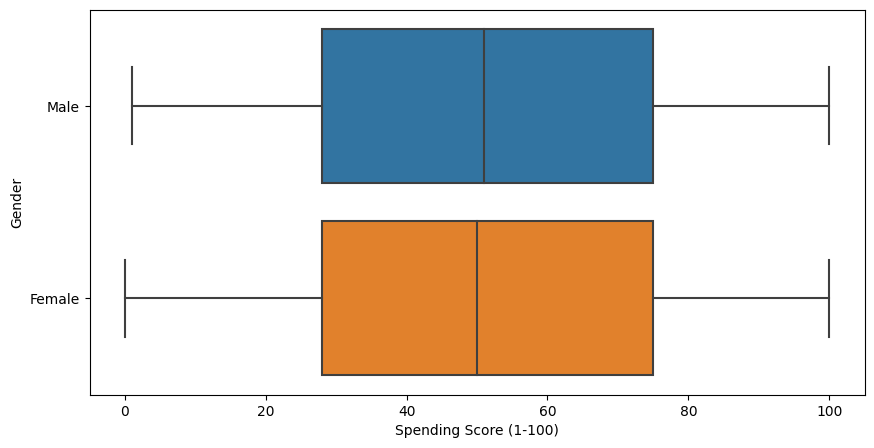

In [30]:
#spending scores for both genders is about the same
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x= 'Spending Score (1-100)', y= 'Gender')

<Axes: xlabel='Annual Income ($)', ylabel='Age'>

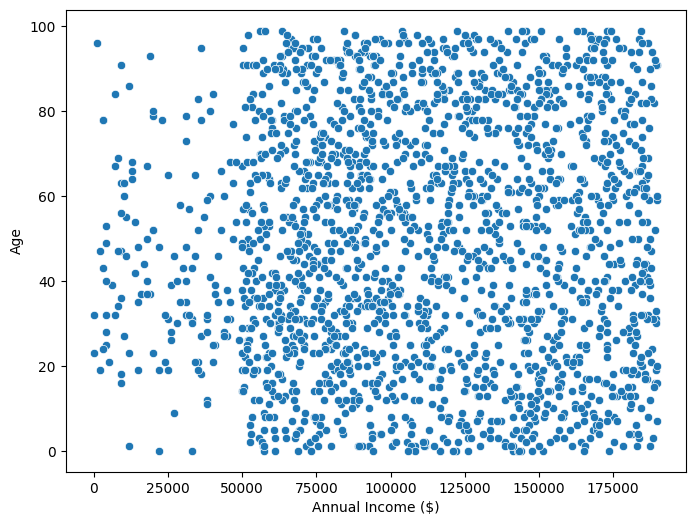

In [31]:
#no correlation between age and income
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Annual Income ($)',y='Age')

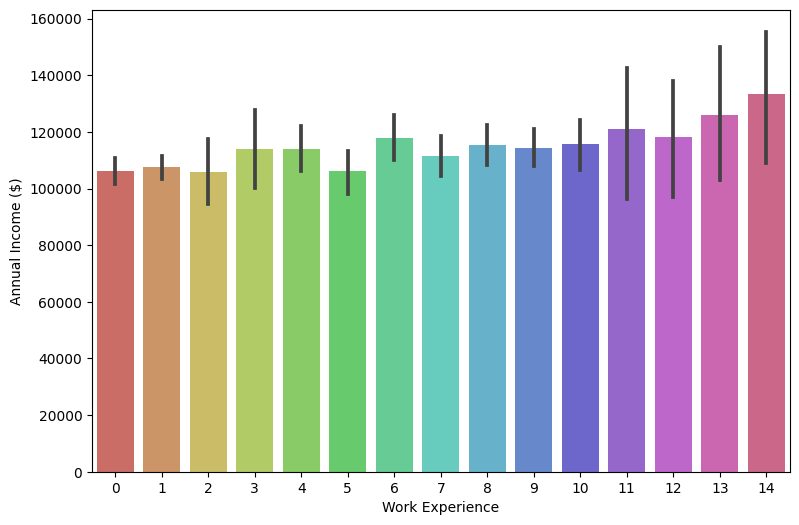

In [32]:
#people with a higher work experience earn more annually
plt.figure(figsize=(9,6))
plot6=sns.barplot(data=df,x="Work Experience",y="Annual Income ($)",palette= 'hls')

<Axes: >

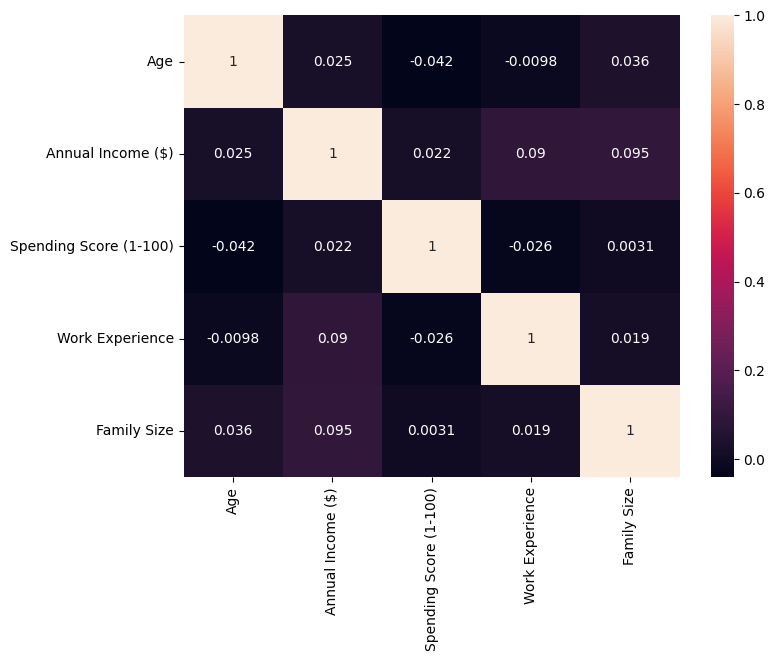

In [33]:
#no significant relationship between the variables
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot = True)

##Models

###With PCA

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [35]:
df.columns

Index(['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Profession', 'Work Experience', 'Family Size'],
      dtype='object')

In [36]:
#encoding categorical variables
le = LabelEncoder()
le.fit(df.Gender)
df['Gender'] = le.transform(df.Gender)
le.fit(df.Profession)
df['Profession'] = le.transform(df.Profession)

In [37]:
#standardizing variables
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(df)
data_scaled = std.transform(df)

Text(0, 0.5, 'Cumulative explained variance')

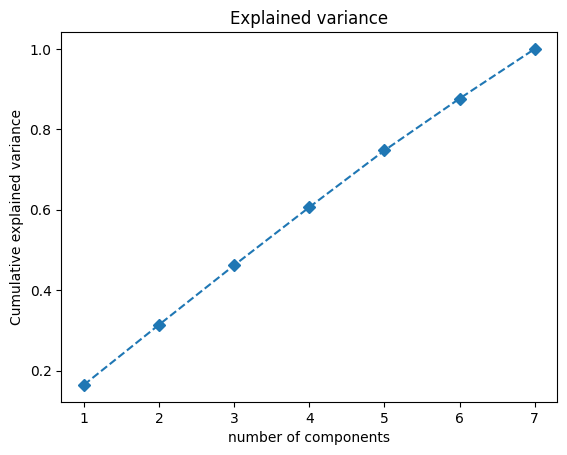

In [38]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 2)
pca.fit(data_scaled)

plt.plot(range(1, len(df.columns)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker= 'D', linestyle= '--'
         )
plt.title("Explained variance")
plt.xlabel("number of components")
plt.ylabel("Cumulative explained variance")

In [39]:
pca = PCA(n_components=6, random_state = 2)
pca.fit(df)
pca_data = pca.transform(data_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Inertia')

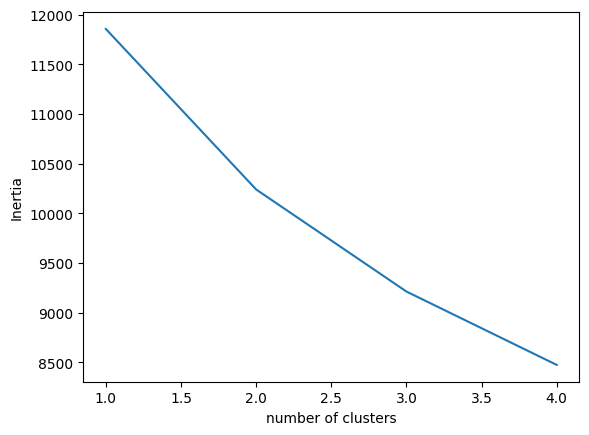

In [40]:
#it is better to cut off at 3 clusters (elbow method)
inertia = []
n_clusters = 4

for n in range(1, n_clusters+1):
  k_model = KMeans(n, random_state = 2)
  k_model.fit(pca_data)
  inertia.append(k_model.inertia_)

n_cluster = range(1,n_clusters+1)
plt.plot(n_cluster,inertia)
plt.xlabel('number of clusters')
plt.ylabel('Inertia')

In [41]:
k_model = KMeans(n_clusters=3, random_state = 2)
k_model.fit(pca_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2)

In [42]:
data=df
data['clusters'] = k_model.fit_predict(pca_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
data.columns

Index(['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Profession', 'Work Experience', 'Family Size', 'clusters'],
      dtype='object')

###Checking for clusters

Text(0, 0.5, 'Annual Income ($)')

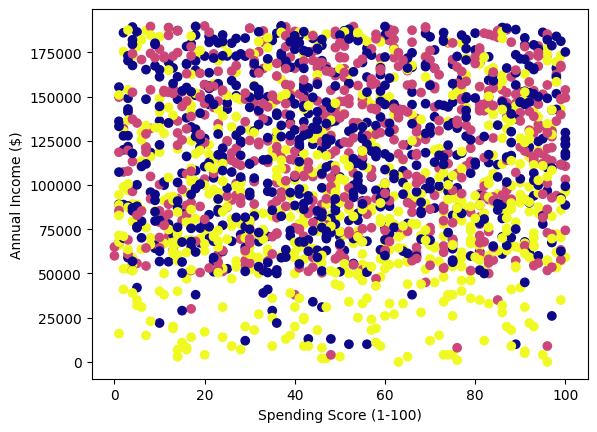

In [44]:
#clusters are mixed together
plt.scatter(data['Spending Score (1-100)'],data['Annual Income ($)'],
            c=data['clusters'], cmap='plasma')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income ($)')

<Axes: xlabel='clusters', ylabel='Annual Income ($)'>

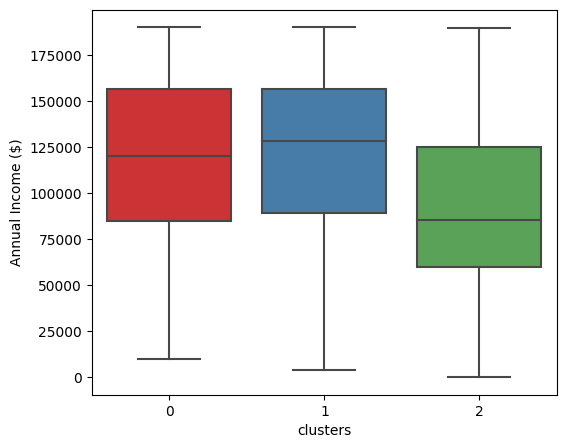

In [45]:
#cluster 0 and 1 have more higher income people and cluster 2 has lower income people
plt.figure(figsize=(6,5))
sns.boxplot(data = df, y= 'Annual Income ($)', x= 'clusters', palette= 'Set1')

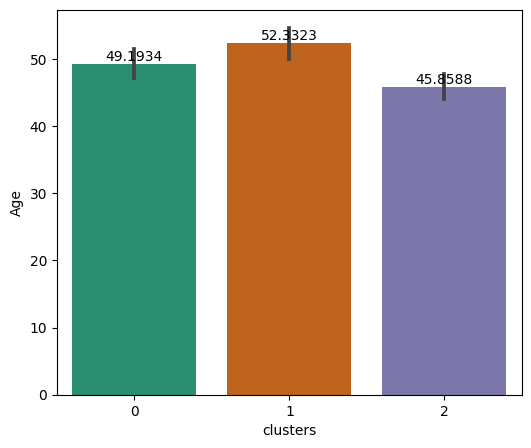

In [46]:
#cluster 0 and 2 have the youngest people and cluster 1 has the oldest people
plt.figure(figsize=(6,5))
plot1= sns.barplot(data=df,x="clusters",y="Age",palette= 'Dark2')
plot1.bar_label(plot1.containers[0]);

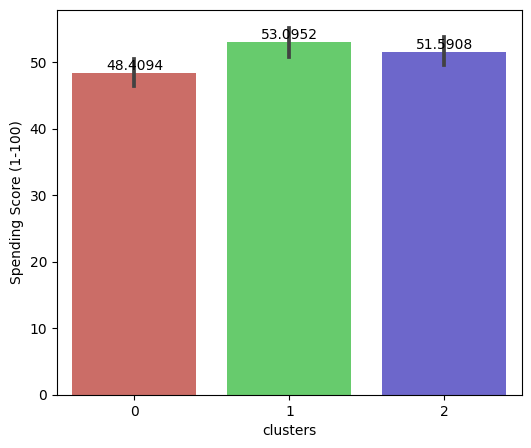

In [47]:
#cluster 0 and 2 have the lower spending score people and cluster 1 has the highest spending score people
plt.figure(figsize=(6,5))
plot1= sns.barplot(data=df,x="clusters",y="Spending Score (1-100)",palette= 'hls')
plot1.bar_label(plot1.containers[0]);

##K-Means

In [48]:
df.columns

Index(['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Profession', 'Work Experience', 'Family Size', 'clusters'],
      dtype='object')

In [49]:
features =  df.drop(['clusters'], axis=1)

In [50]:
k_model = KMeans(n_clusters=3, random_state = 2)
k_model.fit(features)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2)

In [51]:
prediction= k_model.predict(features)

In [52]:
data1 = df
data1['clusters']= prediction

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Inertia')

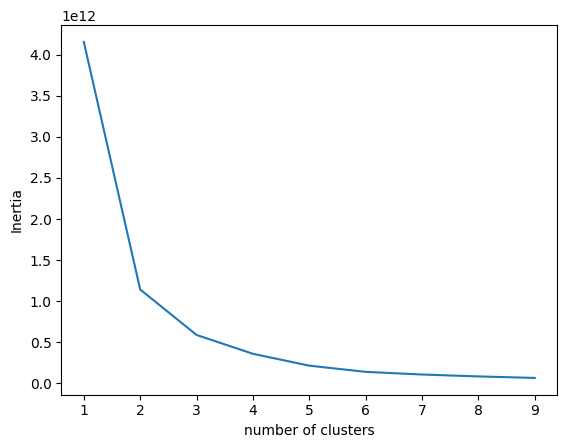

In [53]:
#best at 3 clusters (elbow method)
inertia_list = []
for i in range(1,10):
    k_model = KMeans(i, random_state = 2)
    k_model.fit(features)
    inertia = k_model.inertia_
    inertia_list.append(inertia)
    
n_cluster = range(1,10)
plt.plot(n_cluster,inertia_list)
plt.xlabel('number of clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Annual Income ($)')

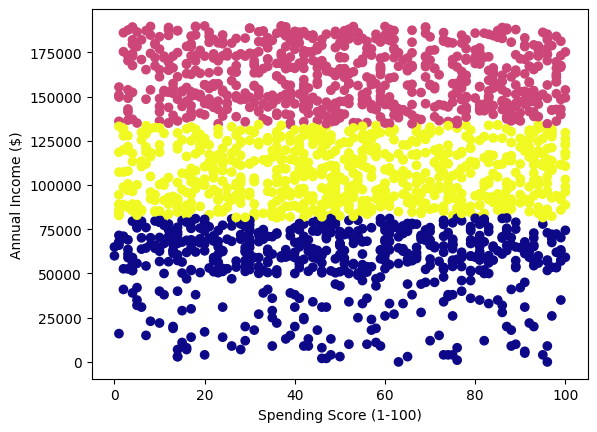

In [54]:
#easily identifiable clusters, blue cluster has people with annual income up to $80,000 and so on
plt.scatter(data1['Spending Score (1-100)'],data1['Annual Income ($)'], c=data1['clusters'], cmap='plasma')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income ($)')

Text(0, 0.5, 'Annual Income ($)')

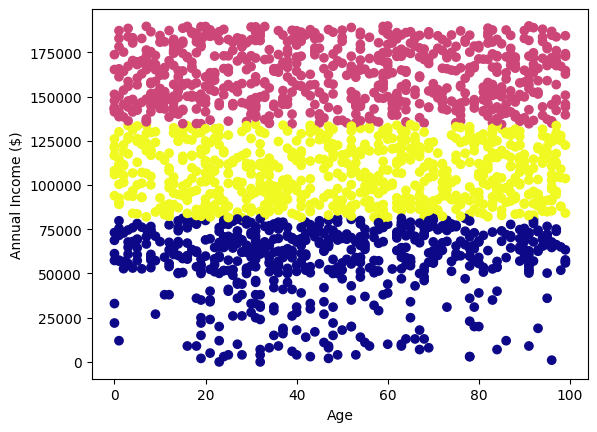

In [55]:
plt.scatter(data['Age'],data['Annual Income ($)'],
            c=data['clusters'], cmap='plasma')
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')

#Task 2 - Regression

##Data Wrangling

In [56]:
#dataset downloaded from https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
df= pd.read_csv('/content/drive/MyDrive/CAR DETAILS FROM CAR DEKHO.csv')

In [57]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [58]:
df.shape

(4340, 8)

In [59]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [60]:
#finding data types of columns
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [61]:
#dropping duplicates
df= df.drop_duplicates()

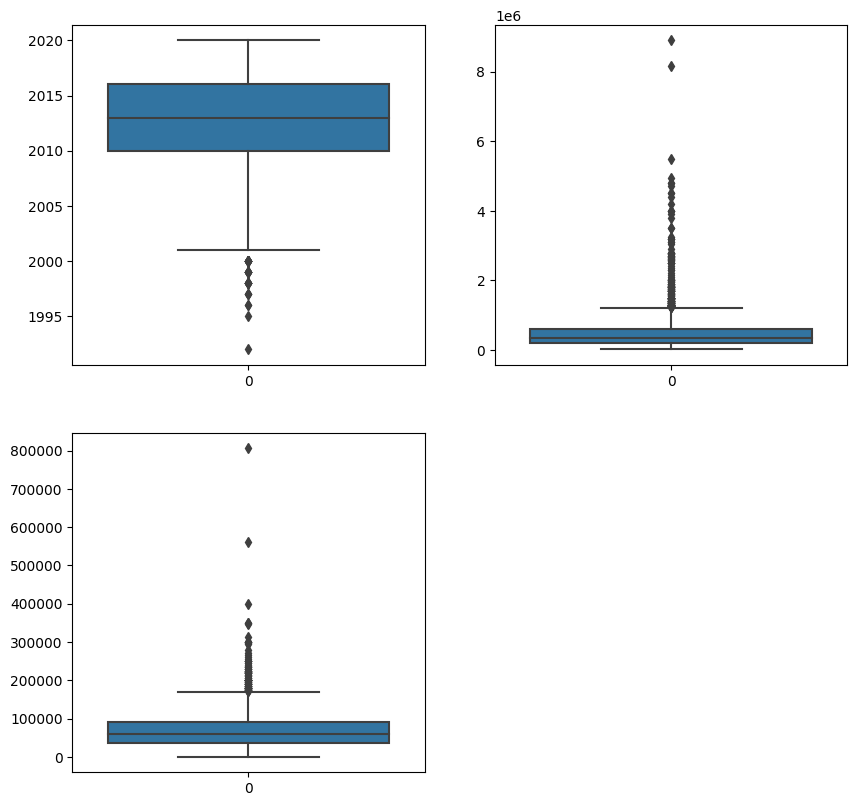

In [62]:
#checking outliers
plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
sns.boxplot(data = df['year'])

plt.subplot(3,2,2)
sns.boxplot(data = df['selling_price'])

plt.subplot(3,2,3)
sns.boxplot(data = df['km_driven'])

plt.show()

In [63]:
#calculating iqr,q1 and q3 and getting rid of outliers
for x in ['year','selling_price','km_driven']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    #keeping non-outliers
    df= df[((df[x]<max) &(df[x]>min))]

In [64]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [65]:
df.shape

(3218, 8)

##Data Visualisation

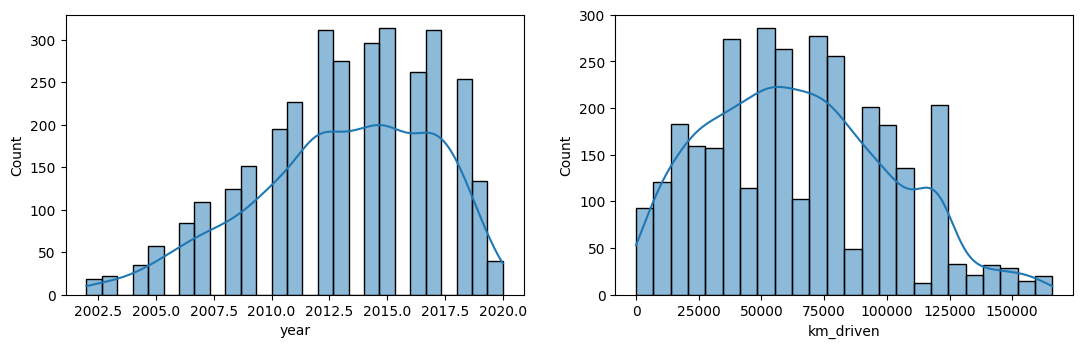

In [66]:
#checking skewness
plt.figure(figsize=(13,8))

plt.subplot(2,2,1)
sns.histplot(df['year'], kde=True)


plt.subplot(2,2,2)
sns.histplot(df['km_driven'], kde=True)

plt.show()

#year is skewed to the left and km_driven is skewed to the right

<Axes: xlabel='fuel', ylabel='selling_price'>

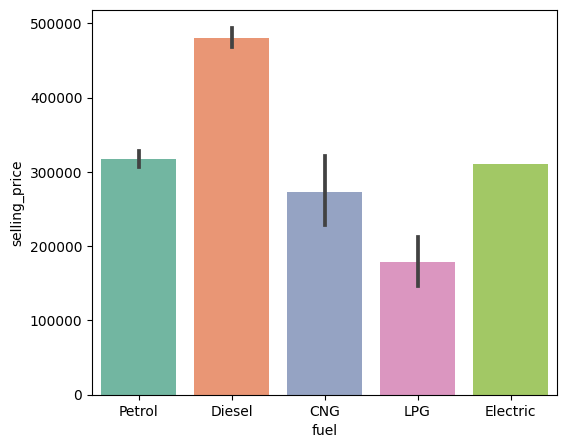

In [67]:
#diesel cars had the higher selling prices
plt.figure(figsize=(6,5))
sns.barplot(data = df, x= 'fuel', y= 'selling_price', palette= 'Set2')

<Axes: xlabel='seller_type', ylabel='selling_price'>

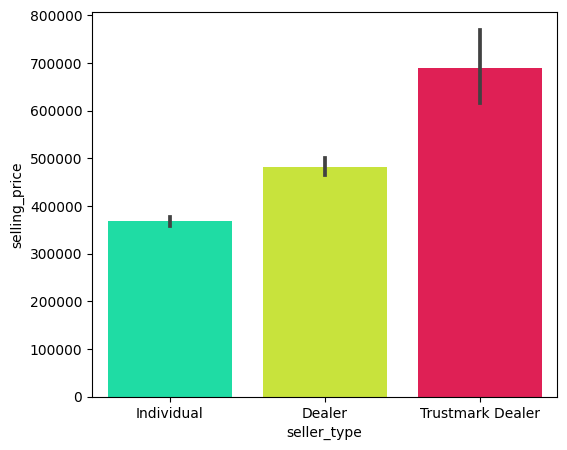

In [68]:
#cars sold through trustmark dealers had the highest prices
plt.figure(figsize=(6,5))
sns.barplot(data = df, x= 'seller_type', y= 'selling_price', palette= 'gist_ncar')

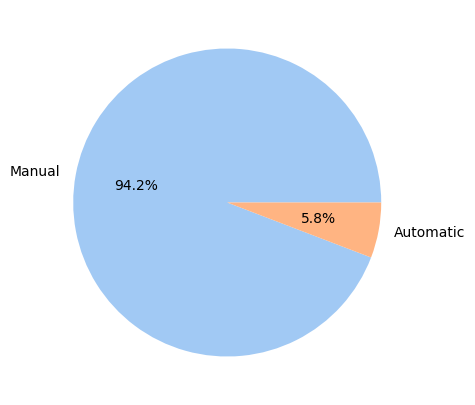

In [69]:
#most of the cars sold are manual
plt.figure(figsize=(6,5))
df2=df["transmission"].value_counts()
df3=pd.DataFrame(df2)
plt.pie(df3["transmission"],labels=df3.index,autopct="%0.01f%%",colors=sns.color_palette("pastel"));

<Axes: xlabel='transmission', ylabel='selling_price'>

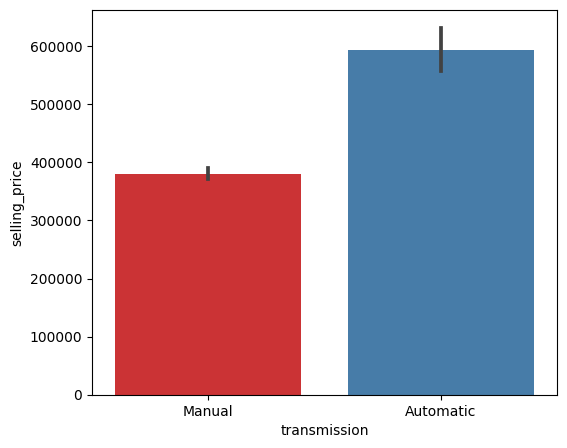

In [70]:
#automatic cars had a higher selling price
plt.figure(figsize=(6,5))
sns.barplot(data = df, x= 'transmission', y= 'selling_price', palette= 'Set1')

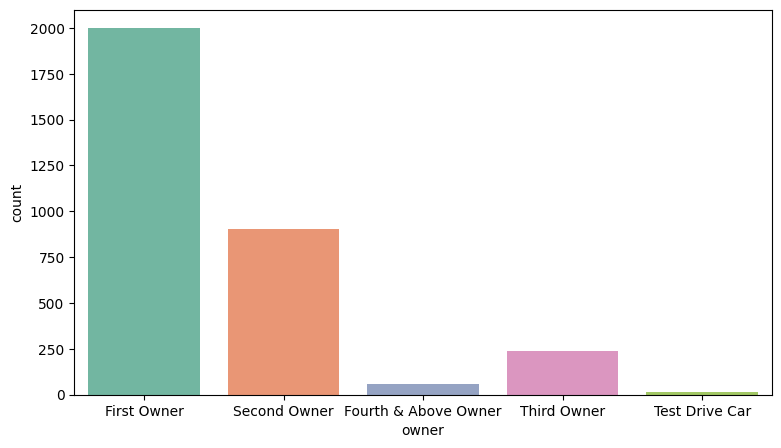

In [71]:
#most of the cars sold were first owner ones
plt.figure(figsize = (9, 5))
plot1 = sns.countplot(x='owner', data=df, palette="Set2")

<Axes: xlabel='owner', ylabel='selling_price'>

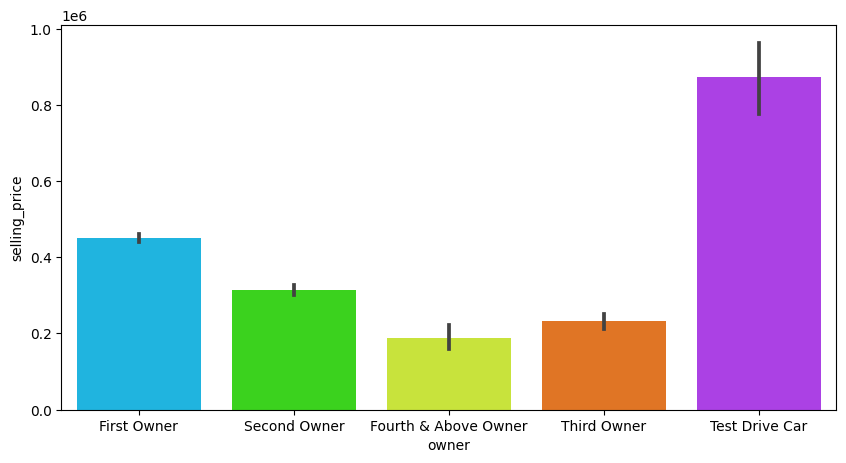

In [72]:
#the test drive cars had a higher selling price
plt.figure(figsize=(10,5))
sns.barplot(data = df, x= 'owner', y= 'selling_price', palette= 'gist_ncar')

<Axes: xlabel='year', ylabel='selling_price'>

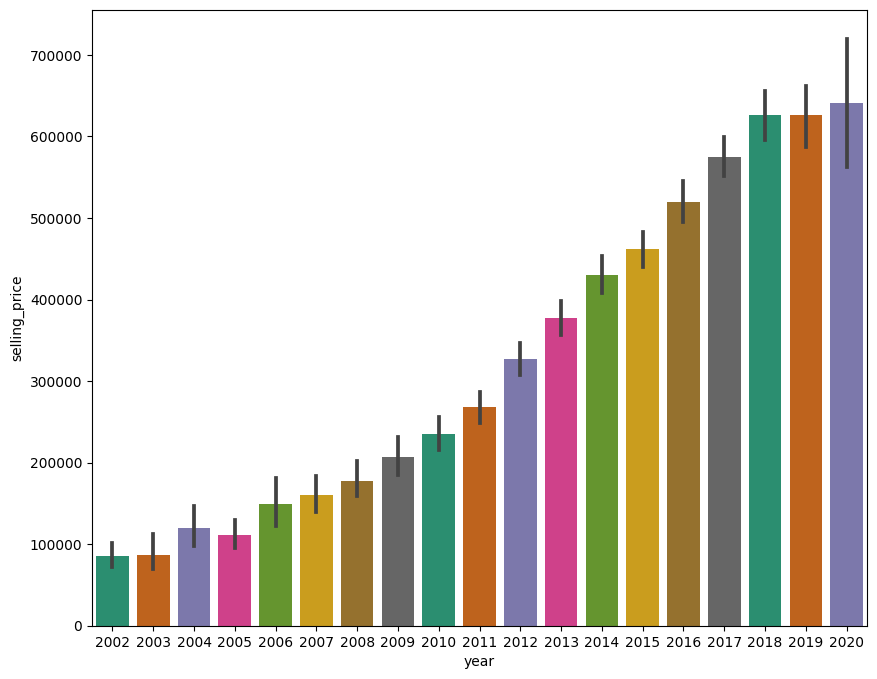

In [73]:
#the price range has increased in recent years
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="year", y="selling_price",palette= 'Dark2')

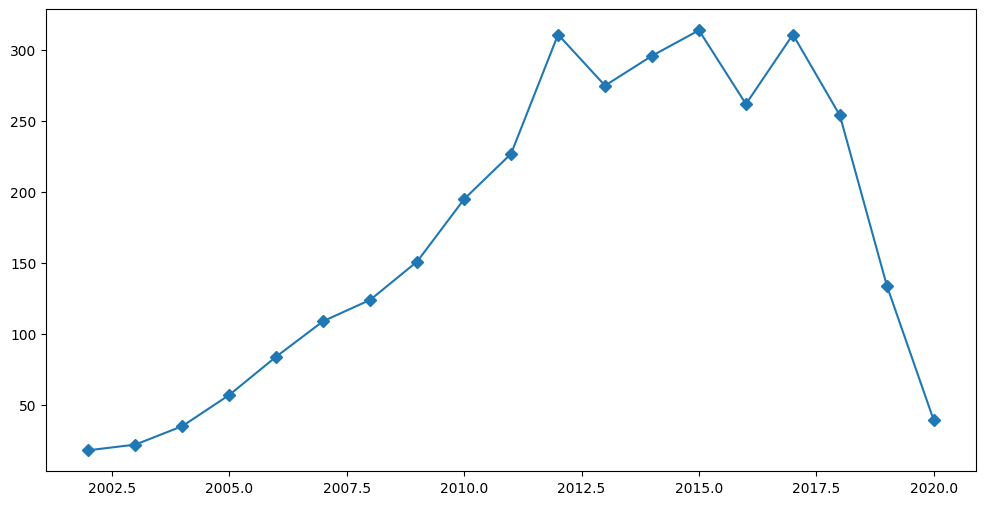

In [74]:
#cars sold from the years 2011-2017 had the highest sales
df1=df.groupby(["year"])["name"].count()
sold_year=pd.DataFrame(df1)
plt.figure(figsize=(12,6))
plt.plot(sold_year,marker="D", linestyle = '-')
plt.show()

<Axes: >

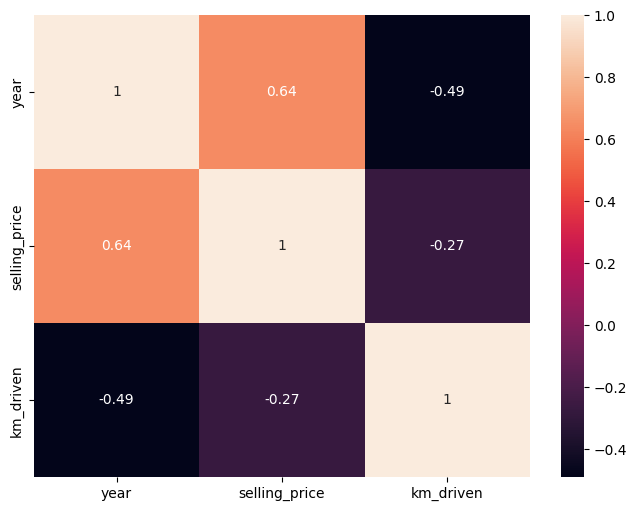

In [75]:
#selling price and year have a moderate relationship
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot = True)

##Models

##Linear Regression

In [76]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics, linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [77]:
#removing name as it will be unnecessary now
df = df.drop(['name'], axis=1)

In [78]:
le = LabelEncoder()
le.fit(df.fuel)
df['fuel'] = le.transform(df.fuel)
le.fit(df.transmission)
df['transmission'] = le.transform(df.transmission)
le.fit(df.seller_type)
df['seller_type'] = le.transform(df.seller_type)
le.fit(df.owner)
df['owner'] = le.transform(df.owner)

In [79]:
features = df.drop(['selling_price'], axis=1)
labels = df['selling_price']

In [80]:
x_train, x_test, y_train, y_test =\
train_test_split(features, labels, test_size=0.2, random_state=69)

In [81]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [82]:
lr_model = linear_model.LinearRegression()

In [83]:
lr_model.fit(x_train_sc, y_train)

LinearRegression()

In [84]:
lr_model.coef_

array([132837.23177278, -18674.8384256 , -79446.95641888, -11862.72785489,
       -44355.35488395,  -7639.86794603])

In [85]:
lr_model.intercept_

391224.1655011627

In [86]:
predictions = lr_model.predict(x_test_sc)

print("Linear Regression Variance Score is {}".format(lr_model.score(x_test_sc, y_test)))
print("Linear Regression Mean Absolute Error is {}".format(metrics.mean_absolute_error(y_test, predictions))) 
print("Linear Regression MSE is {}".format(metrics.mean_squared_error(y_test, predictions)))
print("Linear Regression RMSE is {}".format(np.sqrt(metrics.mean_absolute_error(y_test, predictions))))

Linear Regression Variance Score is 0.5338115011728577
Linear Regression Mean Absolute Error is 131435.7569636007
Linear Regression MSE is 29077643295.510517
Linear Regression RMSE is 362.5406969756646


##XGboost, LightGBM and Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
import lightgbm as lgbm

In [88]:
RF_rg = RandomForestRegressor(random_state= 2)
XGB_rg = xgb.XGBRegressor(random_state= 2)
LGBM_rg = lgbm.LGBMRegressor(random_state= 2)

In [89]:
RF_rg.fit(x_train_sc, y_train)
XGB_rg.fit(x_train_sc, y_train)
LGBM_rg.fit(x_train_sc, y_train)

LGBMRegressor(random_state=2)

###Random Forest

In [90]:
predictions = RF_rg.predict(x_test_sc)

print("Random Forest R-squared is {}".format(RF_rg.score(x_test_sc, y_test)))
print("Random Forest Mean Absolute Error is {}".format(metrics.mean_absolute_error(y_test, predictions))) 
print("Random Forest MSE is {}".format(metrics.mean_squared_error(y_test, predictions)))
print("Random Forest RMSE is {}".format(np.sqrt(metrics.mean_absolute_error(y_test, predictions))))

Random Forest R-squared is 0.5085458280641271
Random Forest Mean Absolute Error is 131709.06711659688
Random Forest MSE is 30653542812.81939
Random Forest RMSE is 362.9174384300056


####Hyperparameter tuning - Random Forest

In [91]:
from sklearn.model_selection import GridSearchCV


paras = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None],
         "n_estimators": [80, 100,150],
          'min_samples_leaf': [1, 2, 3],
          }
  

gs = GridSearchCV(estimator=RF_rg, param_grid=paras, scoring='r2', n_jobs=-1, cv=5)
RF_model = gs.fit(x_train_sc, y_train)

In [92]:
RF_model.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 100}

In [93]:
model = RF_model.best_estimator_
predictions = model.predict(x_test_sc)

print("Random Forest Variance Score is {}".format(model.score(x_test_sc, y_test)))
print("Random Forest Mean Absolute Error is {}".format(metrics.mean_absolute_error(y_test, predictions))) 
print("Random Forest MSE is {}".format(metrics.mean_squared_error(y_test, predictions)))
print("Random Forest RMSE is {}".format(np.sqrt(metrics.mean_absolute_error(y_test, predictions))))

Random Forest Variance Score is 0.5905759878564705
Random Forest Mean Absolute Error is 119124.08239983521
Random Forest MSE is 25537063680.6306
Random Forest RMSE is 345.1435678088688


###XGBoost

In [94]:
predictions = XGB_rg.predict(x_test_sc)

print("XGBoost R-squared is {}".format(XGB_rg.score(x_test_sc, y_test)))
print("XGBoost Mean Absolute Error is {}".format(metrics.mean_absolute_error(y_test, predictions))) 
print("XGBoost MSE is {}".format(metrics.mean_squared_error(y_test, predictions)))
print("XGBoost RMSE is {}".format(np.sqrt(metrics.mean_absolute_error(y_test, predictions))))

XGBoost R-squared is 0.5366936976671564
XGBoost Mean Absolute Error is 125871.28084360443
XGBoost MSE is 28897871632.804043
XGBoost RMSE is 354.7834280848028


####Hyperparameter tuning - XGboost

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
paras = {'max_depth': [2,3,5],
          'learning_rate': [0.2, 0.1, 0.008],
          'subsample': [0.65, 0.8, 0.95],
}

rs = RandomizedSearchCV(estimator = XGB_rg,param_distributions = paras,
               n_iter = 100, cv = 5, verbose=2, random_state=4, n_jobs = -1, scoring="r2")

rs.fit(x_train_sc, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=2, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.1, 0.008],
                                        'max_depth': [2, 3, 5],
                                        'subsample': [0.65, 0.8, 0.95]},
                   random_state=4, scoring='r2', verbose=2)

In [97]:
XGB_model = rs.best_estimator_
predictions = XGB_model.predict(x_test_sc)

print("XGBoost R-squared is {}".format(XGB_model.score(x_test_sc, y_test)))
print("XGBoost Mean Absolute Error is {}".format(metrics.mean_absolute_error(y_test, predictions))) 
print("XGBoost MSE is {}".format(metrics.mean_squared_error(y_test, predictions)))
print("XGBoost RMSE is {}".format(np.sqrt(metrics.mean_absolute_error(y_test, predictions))))

XGBoost R-squared is 0.5986884747351853
XGBoost Mean Absolute Error is 118101.71417653338
XGBoost MSE is 25031062352.21464
XGBoost RMSE is 343.6592995635843


###LightGBM

In [98]:
predictions = LGBM_rg.predict(x_test_sc)

print("LightGBM R-squared is {}".format(LGBM_rg.score(x_test_sc, y_test)))
print("LightGBM Mean Absolute Error is {}".format(metrics.mean_absolute_error(y_test, predictions))) 
print("LightGBM MSE is {}".format(metrics.mean_squared_error(y_test, predictions)))
print("LightGBM RMSE is {}".format(np.sqrt(metrics.mean_absolute_error(y_test, predictions))))

LightGBM R-squared is 0.5705220592832733
LightGBM Mean Absolute Error is 121306.65902649485
LightGBM MSE is 26787890295.16982
LightGBM RMSE is 348.29105504806586


####Hyperparameter tuning - LightGBM

In [99]:
paras = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None],
         "n_estimators": [80, 100,150],
          'min_samples_leaf': [1, 2, 3],
          }
gs = GridSearchCV(estimator=LGBM_rg, param_grid=paras, scoring='r2', n_jobs=-1, cv=5)
LGBM_model = gs.fit(x_train_sc, y_train)

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3


In [100]:
model = LGBM_model.best_estimator_
predictions = model.predict(x_test_sc)


print("LightGBM R-squared is {}".format(LGBM_model.score(x_test_sc, y_test)))
print("LightGBM Mean Absolute Error is {}".format(metrics.mean_absolute_error(y_test, predictions)))
print("LightGBM MSE is {}".format(metrics.mean_squared_error(y_test, predictions)))
print("LightGBM RMSE is {}".format(np.sqrt(metrics.mean_absolute_error(y_test, predictions))))

LightGBM R-squared is 0.598126806695966
LightGBM Mean Absolute Error is 118353.11672886809
LightGBM MSE is 25066095354.821945
LightGBM RMSE is 344.0248780667876


##Feature Importance

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train_sc, y_train)

DecisionTreeRegressor()

In [103]:
dt_model.feature_importances_

array([0.52983682, 0.2405419 , 0.11575751, 0.0260933 , 0.04289638,
       0.04487408])

In [104]:
features_names = ['year','km_driven','fuel','seller_type','transmission','owner']

<BarContainer object of 6 artists>

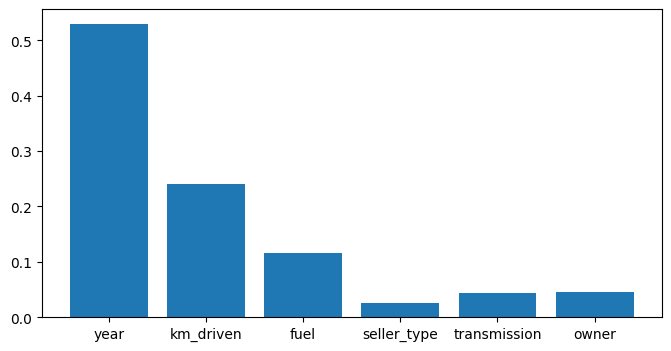

In [105]:
#year is the most important feature
plt.figure(figsize=(8,4))
plt.bar(features_names, dt_model.feature_importances_)

#Task 3 - Classification

##Data Wrangling

In [176]:
#data downloaded from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv
df= pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [177]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [178]:
df.shape

(768, 9)

In [179]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

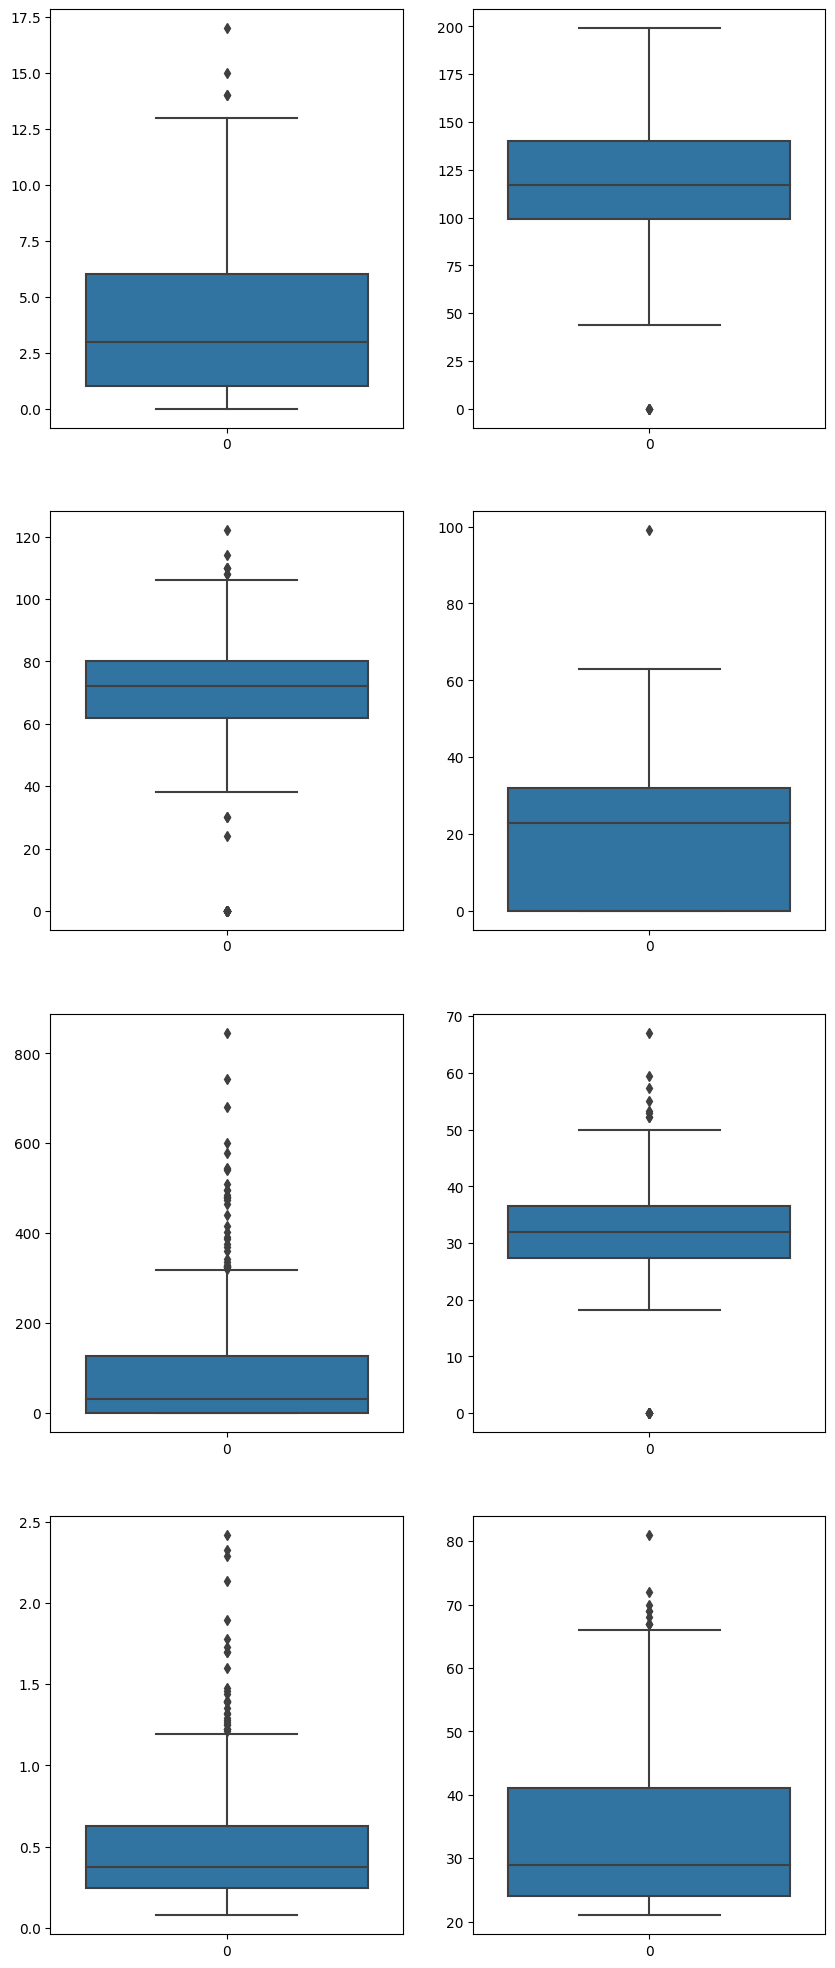

In [180]:
#every column has outliers
plt.figure(figsize=(10,25))

plt.subplot(4,2,1)
sns.boxplot(data = df['Pregnancies'])

plt.subplot(4,2,2)
sns.boxplot(data = df['Glucose'])

plt.subplot(4,2,3)
sns.boxplot(data = df['BloodPressure'])

plt.subplot(4,2,4)
sns.boxplot(data = df['SkinThickness'])

plt.subplot(4,2,5)
sns.boxplot(data = df['Insulin'])

plt.subplot(4,2,6)
sns.boxplot(data = df['BMI'])

plt.subplot(4,2,7)
sns.boxplot(data = df['DiabetesPedigreeFunction'])

plt.subplot(4,2,8)
sns.boxplot(data = df['Age'])


plt.show()

In [181]:
#calculating iqr,q1 and q3 and getting rid of outliers
for x in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.2*intr_qr)
    min = q25-(1.2*intr_qr)
 
    #keeping non-outliers
    df= df[((df[x]<max) &(df[x]>min))]

In [182]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [183]:
#dropping duplicates
df= df.drop_duplicates()

In [184]:
df.shape

(549, 9)

##Data Visualisation

In [115]:
df[('Outcome')].value_counts()

0    393
1    156
Name: Outcome, dtype: int64

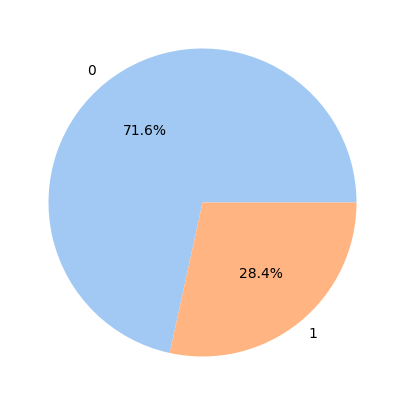

In [116]:
#0- people with no diabetes, 1- people with diabetes
plt.figure(figsize=(6,5))
df2=df["Outcome"].value_counts()
df3=pd.DataFrame(df2)
plt.pie(df3["Outcome"],labels=df3.index,autopct="%0.01f%%",colors=sns.color_palette("pastel"));

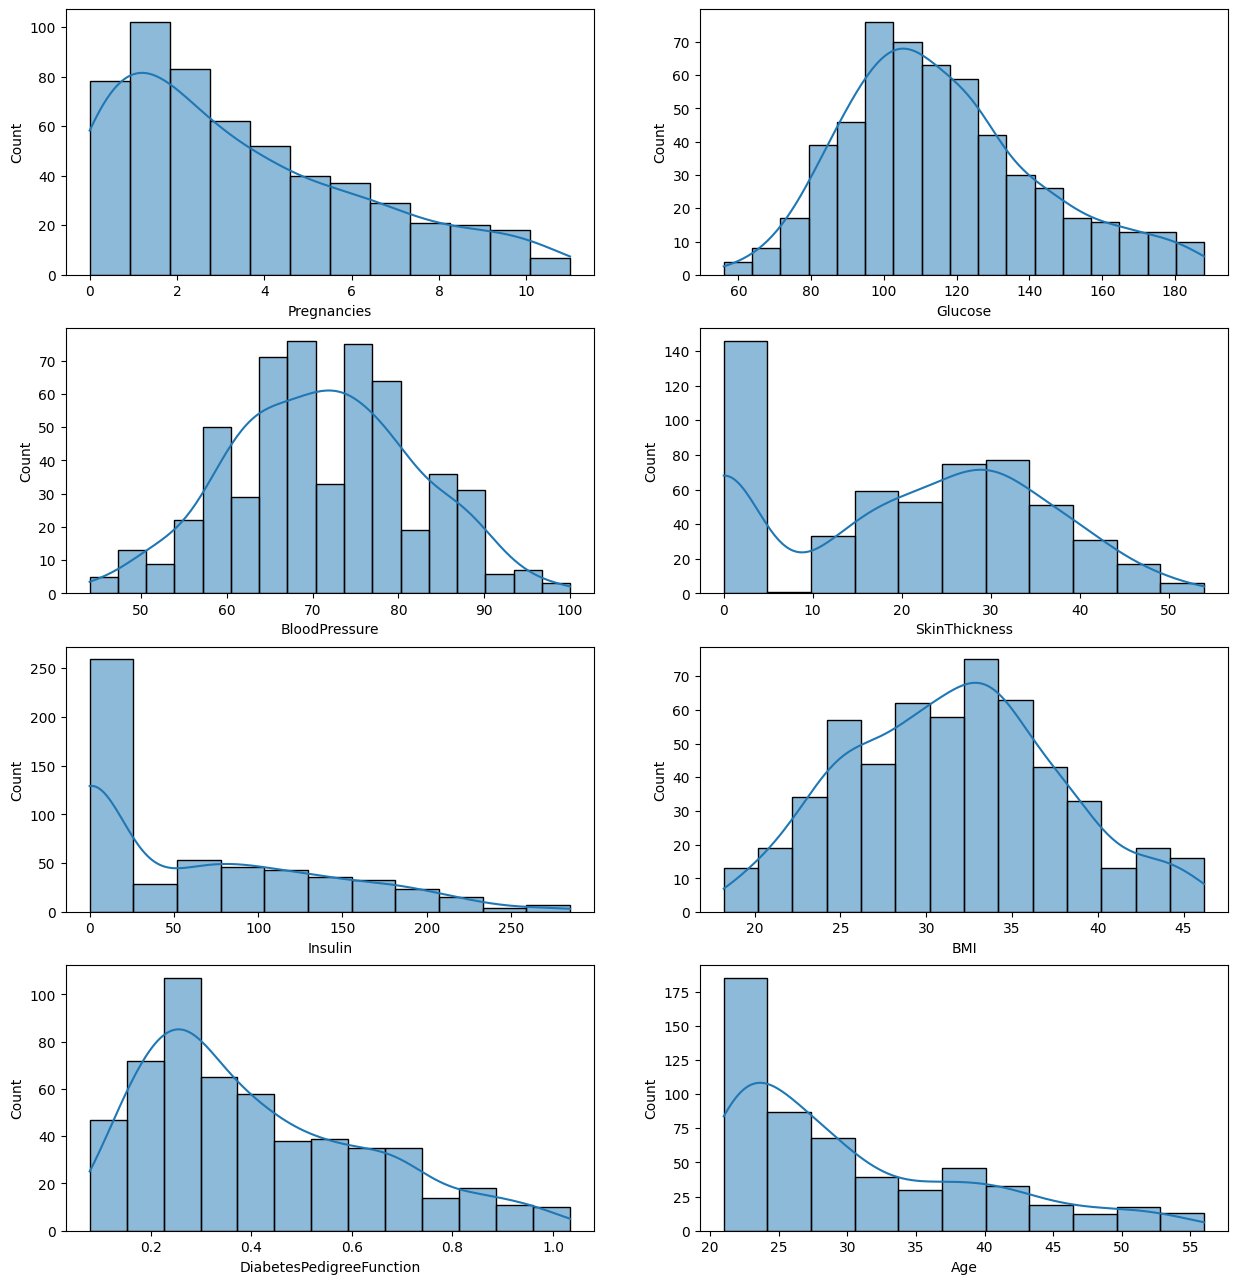

In [117]:
#checking skewness
plt.figure(figsize=(15,20))

plt.subplot(5,2,1)
sns.histplot(df['Pregnancies'], kde=True)

plt.subplot(5,2,2)
sns.histplot(df['Glucose'], kde=True)

plt.subplot(5,2,3)
sns.histplot(df['BloodPressure'], kde=True)

plt.subplot(5,2,4)
sns.histplot(df['SkinThickness'], kde=True)

plt.subplot(5,2,5)
sns.histplot(df['Insulin'], kde=True)

plt.subplot(5,2,6)
sns.histplot(df['BMI'], kde=True)

plt.subplot(5,2,7)
sns.histplot(df['DiabetesPedigreeFunction'], kde=True)

plt.subplot(5,2,8)
sns.histplot(df['Age'], kde=True)


plt.show()

#every variable except skin thickness, BMI and glucose is skewed to the right

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

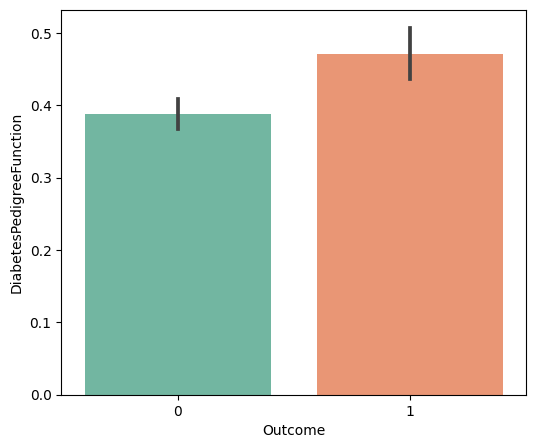

In [118]:
#people who had a lower likelihood of diabetes based on family history had a lower chance of having diabetes compared to higher likelhihood
plt.figure(figsize=(6,5))
sns.barplot(data = df, x= 'Outcome', y= 'DiabetesPedigreeFunction', palette= 'Set2')

<Axes: xlabel='Pregnancies', ylabel='count'>

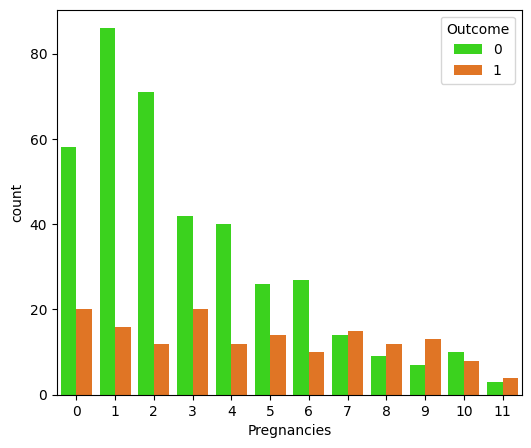

In [119]:
#people with lesser number of pregnancies had lower chances of diabetes
plt.figure(figsize=(6,5))
sns.countplot(data = df,x="Pregnancies",hue="Outcome",palette="gist_ncar")

<Axes: xlabel='BloodPressure', ylabel='count'>

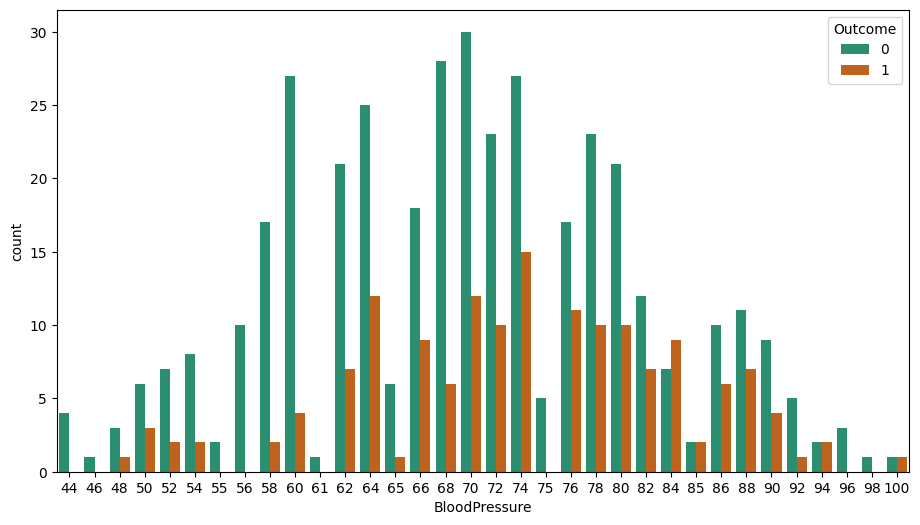

In [120]:
#people with 60-88 Blood Pressure had lower chances of diabetes
plt.figure(figsize=(11,6))
sns.countplot(data = df,x="BloodPressure",hue="Outcome", palette= 'Dark2')

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

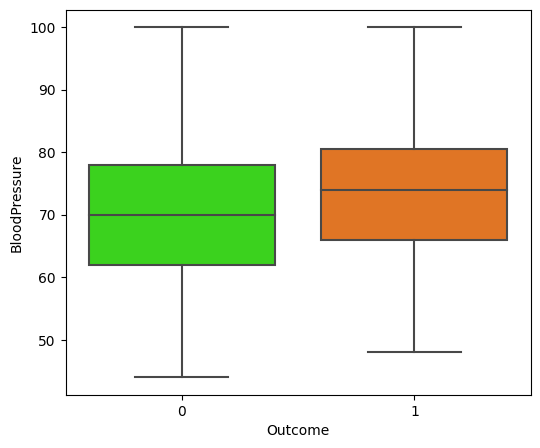

In [121]:
#people who had a higher blood pressure had more chances of diabetes
plt.figure(figsize=(6,5))
sns.boxplot(data = df, x= 'Outcome', y= 'BloodPressure', palette= 'gist_ncar')

<Axes: xlabel='Outcome', ylabel='BMI'>

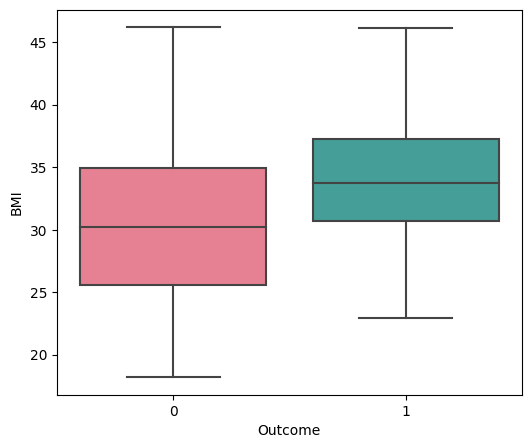

In [122]:
#people who had a higher BMI had more chances of diabetes
plt.figure(figsize=(6,5))
sns.boxplot(data = df, x= 'Outcome', y= 'BMI', palette= 'husl')

<Axes: xlabel='Outcome', ylabel='Glucose'>

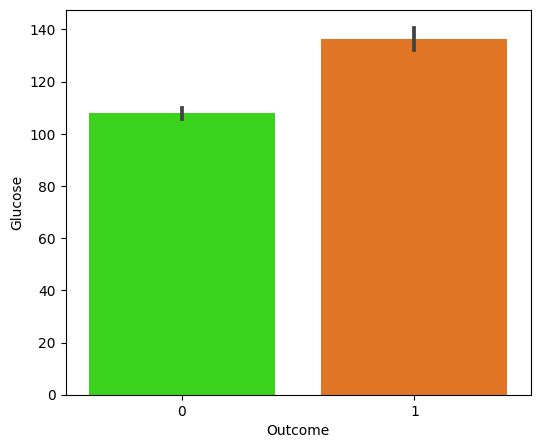

In [123]:
#people who had lower glucose had lower chances of diabetes
plt.figure(figsize=(6,5))
sns.barplot(data = df, x= 'Outcome', y= 'Glucose', palette= 'gist_ncar')

<Axes: xlabel='Outcome', ylabel='Age'>

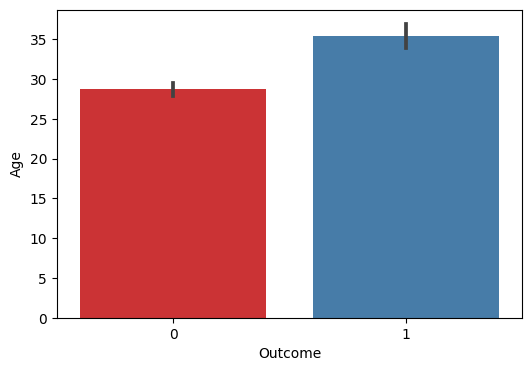

In [124]:
#younger people had lower chances of diabetes
plt.figure(figsize=(6,4))
sns.barplot(data = df, x= 'Outcome', y= 'Age', palette= 'Set1')

<Axes: xlabel='Glucose', ylabel='Insulin'>

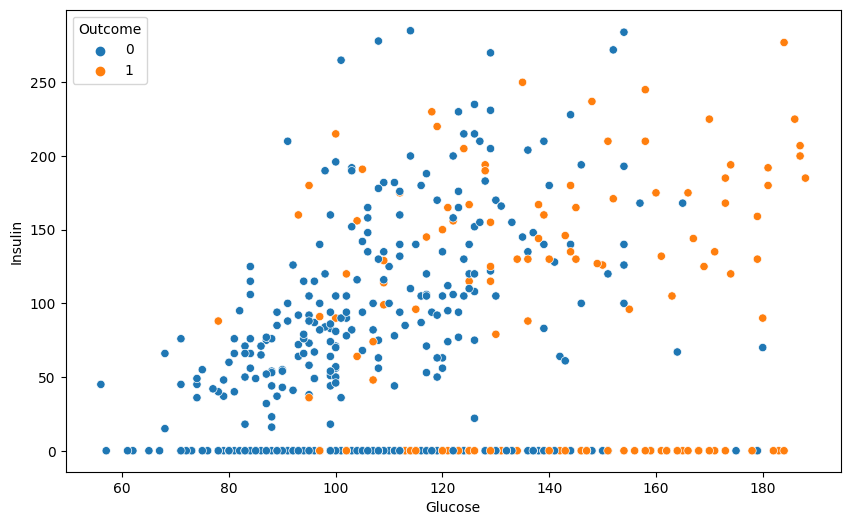

In [125]:
#somewhat postive correlation between insulin and glucose
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Glucose',y='Insulin', hue= 'Outcome')

In [126]:
(df['Insulin']==0).sum()

253

<Axes: >

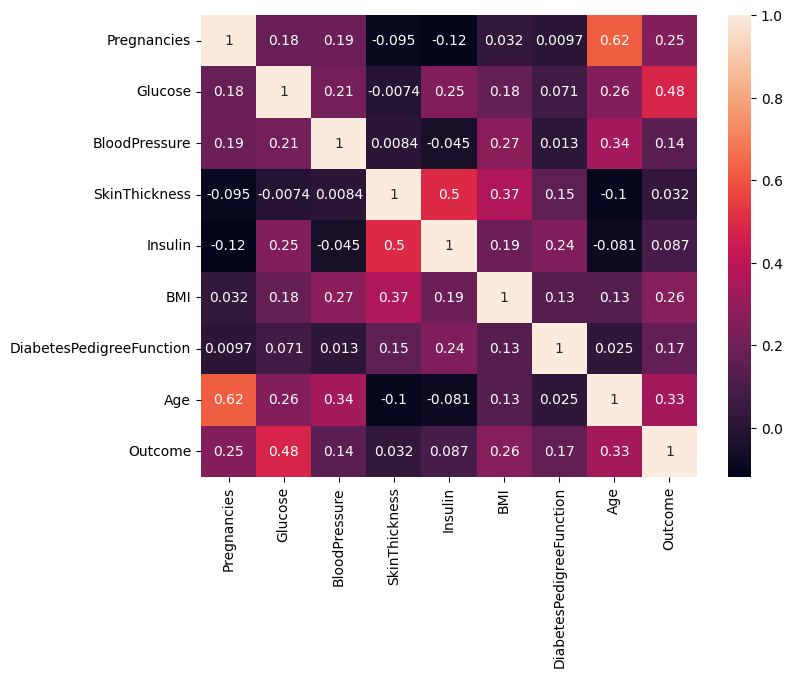

In [127]:
#glucose and outcome have moderate correlation, everything is weakly correlated=no multicollinearity
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot = True)

##Models

###Oversampling

In [185]:
features = df.drop(['Outcome'], axis=1) 
labels = df['Outcome'] 

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [187]:
x_train, x_test, y_train, y_test = \
train_test_split(features, labels, test_size=0.2, random_state=1234)

In [188]:
training = pd.concat([x_train, y_train], axis = 1)

In [189]:
healthy = training[training.Outcome == 0] #majority
diabetic = training[training.Outcome == 1] #minority

In [190]:
diabetic.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            95       85             25             36       37.4  0.247                     24   1          1
6            125      78             31             0        27.6  0.565                     49   1          1
7            178      84             0              0        39.9  0.331                     41   1          1
             161      86             0              0        30.4  0.165                     47   1          1
             160      54             32             175      30.5  0.588                     39   1          1
                                                                                                            ..
2            155      74             17             96       26.6  0.433                     27   1          1
             144      58             33             135      31.6  0.422                     25   1          1
      

In [191]:
healthy.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            67       76             0              0        45.3  0.194                     46   0          1
4            83       86             19             0        29.3  0.317                     34   0          1
             97       60             23             0        28.2  0.443                     22   0          1
             95       70             32             0        32.1  0.612                     24   0          1
             92       80             0              0        42.2  0.237                     29   0          1
                                                                                                            ..
1            130      70             13             105      25.9  0.472                     22   0          1
                      60             23             170      28.6  0.692                     21   0          1
      

In [192]:
#oversampling to reduce bias
from sklearn.utils import resample

diabetic_oversample = resample(diabetic, 
                                 replace=True,    
                                 n_samples=315,    # making minority number same as majority
                                 random_state=56) 

In [193]:
training = pd.concat([healthy, diabetic_oversample])

In [194]:
x_train = training.drop(['Outcome'], axis=1) 
y_train = training['Outcome'] 

In [195]:
#standardised to make sure they contribute equally to the models to avoid bias
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

###Decision Tree

In [196]:
dt_model = DecisionTreeClassifier(random_state = 69)
dt_model.fit(x_train_sc, y_train)

DecisionTreeClassifier(random_state=69)

In [197]:
def evaluate(model, x_test_sc, y_test):
    predictions = dt_model.predict(x_test_sc)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)
    print('F1 score: %f' % f1)

In [198]:
print("Decision Tree")
evaluate(dt_model, x_test_sc, y_test)

Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        78
           1       0.49      0.56      0.52        32

    accuracy                           0.70       110
   macro avg       0.65      0.66      0.65       110
weighted avg       0.71      0.70      0.71       110

[[59 19]
 [14 18]]
Accuracy: 0.700000
Precision: 0.647353
Recall: 0.659455
F1 score: 0.651598


####Hyperparameter tuning - Decision Tree

In [199]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold 

In [200]:
paras = {
    'max_depth': [5,6,8,9], 
    'min_samples_leaf': [4,5,6],
}

In [201]:
abc = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=456)
gs = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid =paras,
                           scoring='precision',
                           cv=abc,
                           n_jobs=-1,
                           verbose=10)

In [202]:
gs.fit(x_train_sc, y_train)

Fitting 20 folds for each of 12 candidates, totalling 240 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=456),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 8, 9],
                         'min_samples_leaf': [4, 5, 6]},
             scoring='precision', verbose=10)

In [203]:
gs.best_params_

{'max_depth': 9, 'min_samples_leaf': 6}

In [204]:
dt_model = DecisionTreeClassifier(max_depth=9, min_samples_leaf=6, random_state = 456)
dt_model.fit(x_train_sc, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=6, random_state=456)

In [205]:
def evaluate(model, x_test, y_test):
    predictions = dt_model.predict(x_test_sc)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)
    print('F1 score: %f' % f1)

In [206]:
#accuracy increased to 70.91%
print("Decision Tree")
evaluate(dt_model, x_test_sc, y_test)

Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        78
           1       0.50      0.69      0.58        32

    accuracy                           0.71       110
   macro avg       0.67      0.70      0.68       110
weighted avg       0.75      0.71      0.72       110

[[56 22]
 [10 22]]
Accuracy: 0.709091
Precision: 0.674242
Recall: 0.702724
F1 score: 0.678363


###Logistic Regression

In [207]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 2)

In [208]:
#Training the model 
lr_model.fit(x_train_sc,y_train)

LogisticRegression(random_state=2)

In [209]:
#have to use scaled value
predictions = lr_model.predict(x_test_sc)

In [210]:
def evaluate(model, x_test_sc, y_test):
    predictions = lr_model.predict(x_test_sc)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)
    print('F1 score: %f' % f1)

In [211]:
print("Logisitic Regression")
evaluate(lr_model, x_test_sc, y_test)

Logisitic Regression
              precision    recall  f1-score   support

           0       0.91      0.79      0.85        78
           1       0.62      0.81      0.70        32

    accuracy                           0.80       110
   macro avg       0.77      0.80      0.78       110
weighted avg       0.83      0.80      0.81       110

[[62 16]
 [ 6 26]]
Accuracy: 0.800000
Precision: 0.765406
Recall: 0.803686
F1 score: 0.776009


###XGboost, LightGBM and Catboost

In [155]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.6 MB/s eta 0:00:00


In [156]:
from sklearn.model_selection import train_test_split
import xgboost
import lightgbm
import catboost

In [157]:
XGB_clf = xgboost.XGBClassifier(random_state = 2)
LGBM_clf = lightgbm.LGBMClassifier(random_state = 2)
CAT_clf = catboost.CatBoostClassifier(verbose=0, random_state = 2) #verbose=0 to avoid output

In [158]:
XGB_clf.fit(x_train_sc, y_train)
LGBM_clf.fit(x_train_sc, y_train)
CAT_clf.fit(x_train_sc, y_train)

In [159]:
def evaluate(model, x_test_sc, y_test):
    predictions = model.predict(x_test_sc)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)
    print('F1 score: %f' % f1)

In [160]:
#XGboost has highest accuracy
print("XGBoost")
evaluate(XGB_clf, x_test_sc, y_test)
print("LightGBM")
evaluate(LGBM_clf, x_test_sc, y_test)
print("Catboost")
evaluate(CAT_clf, x_test_sc, y_test)

XGBoost
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        78
           1       0.69      0.69      0.69        32

    accuracy                           0.82       110
   macro avg       0.78      0.78      0.78       110
weighted avg       0.82      0.82      0.82       110

[[68 10]
 [10 22]]
Accuracy: 0.818182
Precision: 0.779647
Recall: 0.779647
F1 score: 0.779647
LightGBM
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        78
           1       0.64      0.78      0.70        32

    accuracy                           0.81       110
   macro avg       0.77      0.80      0.78       110
weighted avg       0.83      0.81      0.81       110

[[64 14]
 [ 7 25]]
Accuracy: 0.809091
Precision: 0.771217
Recall: 0.800881
F1 score: 0.781643
Catboost
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        78
           1       0.63

####Hyperparameter tuning - Catboost

In [161]:
from scipy.stats import randint
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV


Cat_clf = CatBoostClassifier(random_state= 2)

paras = { "learning_rate": np.linspace(0,0.2,5),"max_depth": randint(5, 10)}
               
rs = RandomizedSearchCV(Cat_clf , paras, scoring='accuracy', cv =5)
rs.fit(x_train_sc, y_train)

print(rs.best_params_)

Streaming output truncated to the last 5000 lines.
21:	learn: 0.3931297	total: 35.2ms	remaining: 1.56s
22:	learn: 0.3861765	total: 36.8ms	remaining: 1.56s
23:	learn: 0.3793769	total: 38.3ms	remaining: 1.55s
24:	learn: 0.3729864	total: 39.7ms	remaining: 1.55s
25:	learn: 0.3641462	total: 41.2ms	remaining: 1.54s
26:	learn: 0.3588604	total: 42.5ms	remaining: 1.53s
27:	learn: 0.3534076	total: 43.9ms	remaining: 1.52s
28:	learn: 0.3485244	total: 45.4ms	remaining: 1.52s
29:	learn: 0.3440409	total: 46.8ms	remaining: 1.51s
30:	learn: 0.3389025	total: 48.3ms	remaining: 1.51s
31:	learn: 0.3335410	total: 49.7ms	remaining: 1.5s
32:	learn: 0.3275224	total: 51.2ms	remaining: 1.5s
33:	learn: 0.3237330	total: 52.6ms	remaining: 1.49s
34:	learn: 0.3194771	total: 54.1ms	remaining: 1.49s
35:	learn: 0.3162878	total: 55.7ms	remaining: 1.49s
36:	learn: 0.3131226	total: 57.2ms	remaining: 1.49s
37:	learn: 0.3102604	total: 58.6ms	remaining: 1.48s
38:	learn: 0.3056749	total: 60ms	remaining: 1.48s
39:	learn: 0.3011

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/catboost/core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.9/dist-packages/catboost/core.py", line 2339, in _fit
    train

21:	learn: 0.2129963	total: 94.7ms	remaining: 4.21s
22:	learn: 0.2083570	total: 101ms	remaining: 4.27s
23:	learn: 0.2015961	total: 110ms	remaining: 4.46s
24:	learn: 0.1968961	total: 113ms	remaining: 4.42s
25:	learn: 0.1913055	total: 117ms	remaining: 4.39s
26:	learn: 0.1872568	total: 121ms	remaining: 4.36s
27:	learn: 0.1823167	total: 125ms	remaining: 4.34s
28:	learn: 0.1781578	total: 129ms	remaining: 4.31s
29:	learn: 0.1712987	total: 133ms	remaining: 4.29s
30:	learn: 0.1673341	total: 137ms	remaining: 4.27s
31:	learn: 0.1630853	total: 141ms	remaining: 4.26s
32:	learn: 0.1586286	total: 145ms	remaining: 4.26s
33:	learn: 0.1520268	total: 149ms	remaining: 4.25s
34:	learn: 0.1479355	total: 153ms	remaining: 4.23s
35:	learn: 0.1461402	total: 158ms	remaining: 4.22s
36:	learn: 0.1421948	total: 161ms	remaining: 4.2s
37:	learn: 0.1393537	total: 165ms	remaining: 4.18s
38:	learn: 0.1348555	total: 169ms	remaining: 4.17s
39:	learn: 0.1300501	total: 173ms	remaining: 4.15s
40:	learn: 0.1260721	total: 177

In [162]:
Cat_model = CatBoostClassifier(max_depth=9, learning_rate=0.1, random_state=2)
Cat_model.fit(x_train_sc, y_train)

0:	learn: 0.6253949	total: 11.6ms	remaining: 11.6s
1:	learn: 0.5789707	total: 17ms	remaining: 8.47s
2:	learn: 0.5280041	total: 25.6ms	remaining: 8.52s
3:	learn: 0.4891405	total: 29.3ms	remaining: 7.3s
4:	learn: 0.4560495	total: 33.7ms	remaining: 6.71s
5:	learn: 0.4319569	total: 38.3ms	remaining: 6.35s
6:	learn: 0.4045103	total: 42.5ms	remaining: 6.03s
7:	learn: 0.3864887	total: 46.8ms	remaining: 5.81s
8:	learn: 0.3658627	total: 51.4ms	remaining: 5.66s
9:	learn: 0.3491130	total: 56ms	remaining: 5.54s
10:	learn: 0.3356636	total: 61.6ms	remaining: 5.54s
11:	learn: 0.3219615	total: 67.2ms	remaining: 5.53s
12:	learn: 0.3090116	total: 72.3ms	remaining: 5.49s
13:	learn: 0.2928979	total: 77.4ms	remaining: 5.45s
14:	learn: 0.2781617	total: 83ms	remaining: 5.45s
15:	learn: 0.2648682	total: 87.9ms	remaining: 5.4s
16:	learn: 0.2580281	total: 91.8ms	remaining: 5.31s
17:	learn: 0.2490664	total: 96.3ms	remaining: 5.26s
18:	learn: 0.2376994	total: 100ms	remaining: 5.19s
19:	learn: 0.2310763	total: 105

In [163]:
def evaluate(model, x_test_sc, y_test):
    predictions = Cat_model.predict(x_test_sc)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)
    print('F1 score: %f' % f1)

In [164]:
#accuracy increased to 86.36%
print("CatBoost")
evaluate(Cat_model, x_test_sc, y_test)

CatBoost
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        78
           1       0.74      0.81      0.78        32

    accuracy                           0.86       110
   macro avg       0.83      0.85      0.84       110
weighted avg       0.87      0.86      0.87       110

[[69  9]
 [ 6 26]]
Accuracy: 0.863636
Precision: 0.831429
Recall: 0.848558
F1 score: 0.839040


####Hyperparameter tuning - XGboost

In [165]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


paras = {'max_depth': [4, 5, 7,8],
          'learning_rate': [0.2, 0.04, 0.008],
          'subsample': [0.65, 0.8, 0.95],
}
XGB_clf = xgb.XGBClassifier(random_state=234)
gs = GridSearchCV(estimator=XGB_clf, param_grid=paras, scoring='accuracy', n_jobs=-1, cv=5)
gs.fit(x_train_sc, y_train)
print(gs.best_params_)

{'learning_rate': 0.2, 'max_depth': 4, 'subsample': 0.65}


In [166]:
xgb_model = xgb.XGBClassifier(random_state=234, learning_rate = 0.2, max_depth= 4, subsample = 0.65)
xgb_model.fit(x_train_sc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=234, ...)

In [167]:
def evaluate(model, x_test_sc, y_test):
    predictions = xgb_model.predict(x_test_sc)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)
    print('F1 score: %f' % f1)

In [168]:
#accuracy increased to 83.63%
print("XGBoost")
evaluate(xgb_model, x_test_sc, y_test)

XGBoost
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        78
           1       0.68      0.84      0.75        32

    accuracy                           0.84       110
   macro avg       0.80      0.84      0.81       110
weighted avg       0.85      0.84      0.84       110

[[65 13]
 [ 5 27]]
Accuracy: 0.836364
Precision: 0.801786
Recall: 0.838542
F1 score: 0.814189


####Hyperparameter tuning - LightGBM

In [169]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


abc = KFold(n_splits=5, shuffle=True, random_state=234).split(x_train_sc, y_train)

LGBM_clf = lgb.LGBMClassifier(random_state = 2)

paras = {
    'max_depth': [10,11,12],
    'num_leaves': [28, 80, 250, 400],
    'reg_alpha': [0.2, 0.8, 0.9],
    }

gs = GridSearchCV(estimator=LGBM_clf, param_grid=paras, cv=abc)
gs.fit(x_train_sc,y_train)

print(gs.best_params_)

{'max_depth': 12, 'num_leaves': 28, 'reg_alpha': 0.2}


In [170]:
lgb_model = lgb.LGBMClassifier(max_depth = 12, num_leaves = 28, reg_alpha = 0.2, random_state = 2)
lgb_model.fit(x_train_sc,y_train)

LGBMClassifier(max_depth=12, num_leaves=28, random_state=2, reg_alpha=0.2)

In [171]:
def evaluate(model, x_test_sc, y_test):
    predictions = lgb_model.predict(x_test_sc)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)
    print('F1 score: %f' % f1)

In [172]:
#accuracy increased to 81.82%
print("LightGBM")
evaluate(lgb_model, x_test_sc, y_test)

LightGBM
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        78
           1       0.67      0.75      0.71        32

    accuracy                           0.82       110
   macro avg       0.78      0.80      0.79       110
weighted avg       0.83      0.82      0.82       110

[[66 12]
 [ 8 24]]
Accuracy: 0.818182
Precision: 0.779279
Recall: 0.798077
F1 score: 0.787152


##ROC curves

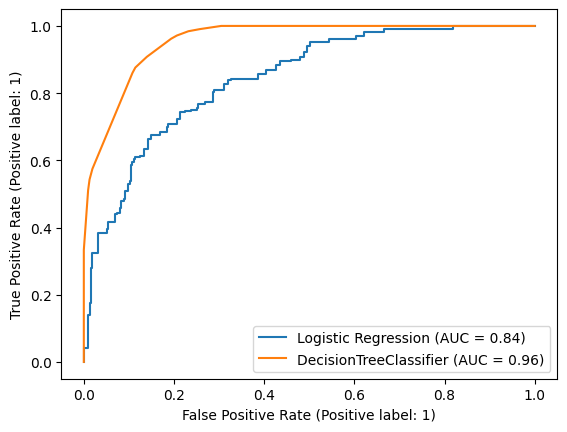

In [212]:
#ROC curves for decision tree and logistic models
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
RocCurveDisplay.from_estimator(lr_model, x_train_sc,y_train, ax=ax, name='Logistic Regression') 
RocCurveDisplay.from_estimator(dt_model, x_train_sc,y_train, ax=ax, name='DecisionTreeClassifier')
plt.show()